**Natural Language Analysis of Moral Political Messaging on Social Media**

Utilizing approximately 35,000 text entries, this project encompasses NLP tasks including:

*   Text cleaning through pre-processing
*   Exploratory data analysis to understand the text corpus
*   Applying machine/deep learning techniques with various word embeddings for model training/predicting

In [31]:
import os
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks/PSIV")

# Set pandas option
pd.set_option('display.max_colwidth', None)

# Load the dataset
df = pd.read_excel('Moral_Tweets_Corpus.xlsx')

# Print dataset information
print("Number of Original Texts =", df.shape[0])
df.head(1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Number of Original Texts = 34987


,id,raw_text,authority,betrayal,care,cheating,degradation,fairness,harm,loyalty,non-moral,purity,subversion,main_foundation
0,521033092132503552,@fergusonoctober @FOX2now #AllLivesMatter Peace and Love Prevail. God Bless.\n,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,care


**Step 1. Preprocessing for Text Cleaning**

Refining text data by removing noise and standardizing formats:

*   Extracting and eliminating HTML content, URLs, mentions, and hashtags; handling contractions; and normalizing text.
*   Stripping punctuation, stopwords, and numerals to standardize text for NLP applications such as POS tagging and word embeddings.
*   Applying stemming techniques to reduce words to their root forms, enhancing text normalization and reducing variability.
*   Post-cleanup analysis may lead to additional refinements to address specific patterns or strings not initially captured.




In [32]:
import nltk
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Set up nltk resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()

# Define a dictionary for expanding contractions
split_adhere_dic = {
    "weve": "we have", "Weve": "We have", "youve": "you have", "Youve": "You have", "youre": "you are", "Youre": "You are", "theyve": "they have", "Theyve": "They have", "theyre": "they are", "Theyre": "They are", "Ive": "I have", "Im": "I am", "Ill": "I will", "Id": "I would",
    "hes": "he's", "Hes": "He's", "shes": "she's", "Shes": "She's", "thats": "that is", "Thats": "That is", "thatd": "that would", "Thatd": "That would", "theres": "there is", "Theres": "There is", "thered": "there would", "Thered": "There would", "heres": "here is", "Heres": "Here is", "isn't": "is not", "isnt": "is not",
    "ain't": "are not", "aint": "are not", "aren't": "are not", "arent": "are not", "weren't": "were not", "werent": "were not", "wasn't": "was not", "wasnt": "was not", "cannot": "can not", "can't": "can not", "cant": "can not", "couldn't": "could not", "couldnt": "could not", "wouldn't": "would not", "wouldnt": "would not", "don't": "do not", "dont": "do not",
    "doesn't": "does not", "doesnt": "does not", "didn't": "did not", "didnt": "did not", "haven't": "have not", "havent": "have not", "havnt": "have not", "hasn't": "has not", "hasnt": "has not", "hadn't": "had not", "hadnt": "had not", "shouldn't": "should not", "shouldnt": "should not", "won't": "will not", "wont": "will not", "mightn't": "might not", "mightnt": "might not", "mustn't": "must not", "mustnt": "must not", "needn't": "need not", "neednt": "need not"
}
split_pattern = re.compile(r'\b(' + '|'.join(split_adhere_dic.keys()) + r')\b')

# Define patterns to remove unwanted text elements
pat1 = r'@[\w_]+'
pat2 = r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
pat3 = r'#'
pat4 = r'www.[^ ]+'
pat5 = r'\n'
pat6 = r'\xa0'
pat7 = r'pic.twitter.com/(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7))

# Function to clean individual tweets
def tweet_cleaner(text):
    """
    Clean tweets by removing HTML content, unwanted patterns, and handling contractions.
    """
    # Remove HTML content
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()

    # Remove unwanted patterns like URLs, mentions, and hashtags
    stripped = re.sub(combined_pat, '', souped)

    # Handle contractions and split camel case words
    split_handled = split_pattern.sub(lambda x: split_adhere_dic[x.group()], stripped)
    return split_handled

# Apply tweet cleaner to the dataframe
df['new_clean_text'] = df.raw_text.apply(tweet_cleaner)

# Function to process text: remove punctuation, stopwords, and numbers
def text_process(text):
    """
    Process text by removing punctuation, stopwords, and numbers.
    This step can be customized to include or exclude specific elements.
    """
    words = re.split(r'\W+', text)
    nopunc = [w.translate(str.maketrans('', '', string.punctuation)) for w in words]
    nostop = ' '.join([word for word in nopunc if word.lower() not in stop_words])
    nonum = ' '.join([word for word in str(nostop).split() if not word.isdigit()])
    return nonum

# Apply text processing to the dataframe
df['new_clean_text_deep'] = df.new_clean_text.apply(text_process)

# Function to stem sentences
def stem_sentences(sentence):
    """
    Stem sentences to reduce words to their root form.
    This helps in normalizing the text and reducing variability.
    """
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming to the dataframe
df['new_clean_text_deep_stem'] = df.new_clean_text_deep.apply(stem_sentences)

# Additional cleaning to remove unwanted patterns
# Define a list of unwanted strings to remove from the text
unwanted_strings = ["sandi", "nyc", " NY ", "blm", " url", " http", " htt ", " via", " ppl ", " pic ", "baltimor", " Dr ", " Mr ", " Sr ", " AL ", " TL ", " CA ", " AP ", " AC ", " PD ", " NJ ", " JK ", " MC ", " AR ", " PA ", " KU ", " AG ", " NE ", " MN ", " SE ", " BM ", " BW ", " EI ", " DC ", " OT ", " GO ", " LA ", " CK ", " EC ", " SA ", " MT ", " BS ", " DE ", " KS ",
    " QB ", " LE ", " OA ", " PA ", " DJ ", " DM ", " WH ", " OI ", " ST ", " AG ", " SC ", " GT ", " MS ", " CD ", " VO ", " BI ", " ET ", " AH ", " NW ", " RP ", " Go ", " CE ", " Oh ", " OH ", " FL ", " BA ", " FU ", " YO ", " GS ", " BO ", " BC ", " VA ", " BT ", " LX ", " DA ", " EN ", " HT ", " AW ", " Co ", " PD ", " SA ", " OD ", " NE ", " XI ",
    " u ", " c ", " d ", " a ", " b ", " t ", " k ", " m ", " v ", " n ", " r ", " w ", " aa ", " cc ", " kkk", " ur ", " fr ", " ya ", " tf ", " fb ", " stfu ", " N ", " F ", " K ", " B ", " J ", " Z ", " H ", " R ", " U ", " E ", " P ", " W ", " Q ", " G ", " L ", " I ", "uddfa", "uddef", "uddeb", "udffb", "udffd", "udffb", "udffc", "udde", "udcaf", "udcaaladi", "udcfa", "uddf", "udcaa",
    " th ", " nd ", " am ", " pm ", " kg ", " hr ", "et al", "Ù", "Ü", "Û", "û", "û", "â", "å", "è", "Ç", "Ï", "ï", "ā", "ª", "Ó", "Ð", "Õ", "ù", "AT_USER", "RT"]

# Remove unwanted strings from the cleaned text
df.new_clean_text_deep_stem = df.new_clean_text_deep_stem.str.replace('|'.join(unwanted_strings), ' ', regex=True).str.strip().replace(' ', '')

# Show the cleaned dataframe
df.head(1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-32-71fd64f12637>:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


,id,raw_text,authority,betrayal,care,cheating,degradation,fairness,harm,loyalty,non-moral,purity,subversion,main_foundation,new_clean_text,new_clean_text_deep,new_clean_text_deep_stem
0,521033092132503552,@fergusonoctober @FOX2now #AllLivesMatter Peace and Love Prevail. God Bless.\n,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,care,AllLivesMatter Peace and Love Prevail. God Bless.,AllLivesMatter Peace Love Prevail God Bless,alllivesmatt peac love prevail god bless


**Step 2. Exploratory Data Analysis (EDA)**

To effectively analyze and understand moral texts, we conduct:

**Distribution Analysis**

To understand the frequency and prevalence of different moral foundations within the dataset, revealing which moral foundations are most commonly discussed, allowing us to pinpoint dominant societal or group values within the data.

<ipython-input-33-56fe3b68fa3c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ordered_categories, y=df[ordered_categories].sum().values, palette=palette)


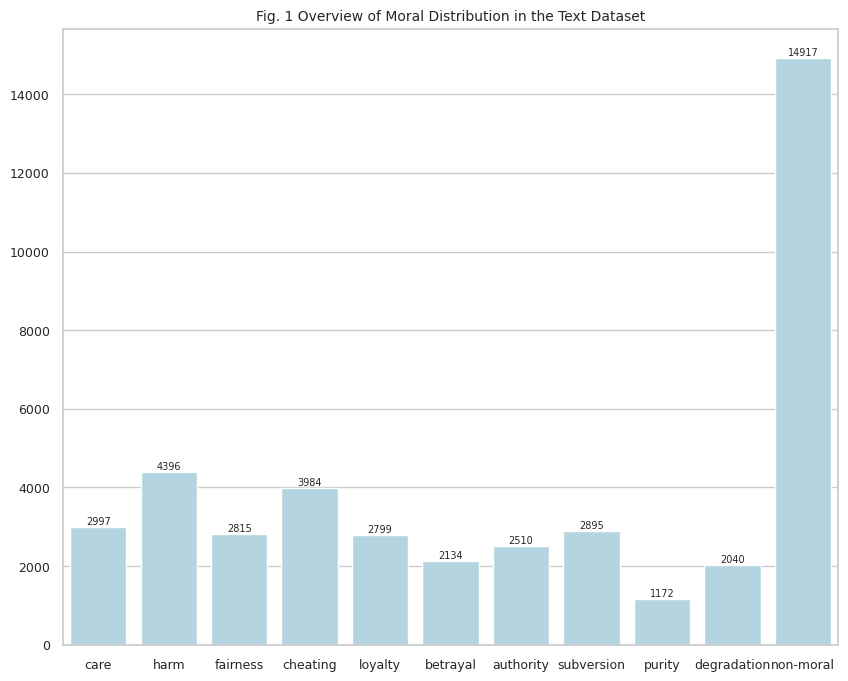

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder columns in DataFrame
ordered_categories = ['care', 'harm', 'fairness', 'cheating', 'loyalty', 'betrayal', 'authority', 'subversion', 'purity', 'degradation', 'non-moral']
columns_list = ['id', 'raw_text', 'new_clean_text', 'new_clean_text_deep', 'new_clean_text_deep_stem'] + ordered_categories
df = df[columns_list]

# Set the style and font scale for seaborn plots
sns.set(style="whitegrid", font_scale=1.5)

# Create a figure with specified dimensions
plt.figure(figsize=(10, 8))

# Generate a uniform light blue color palette
palette = ["lightblue"] * len(ordered_categories)

# Create a bar plot with the categories on the x-axis and their corresponding sums on the y-axis
ax = sns.barplot(x=ordered_categories, y=df[ordered_categories].sum().values, palette=palette)

# Adjust the tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

# Label the y-axis and x-axis
plt.ylabel('', fontsize=9)
plt.xlabel('', fontsize=9)

# Annotate each bar with its height value
rects = ax.patches
labels = df[ordered_categories].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, int(label), ha='center', va='bottom', fontsize=7)

# Title for the plot
plt.title('Fig. 1 Overview of Moral Distribution in the Text Dataset', fontsize=10)

# Display the plot
plt.show()

In [34]:
# Non-moral texts have more entries than other morally charged messages, which may introduce bias if included
df = df.drop(df[df['non-moral'] > 0].index)
df = df.drop(columns=['non-moral'])

**Heatmap of Correlations**

To uncover potential relationships between different moral foundations, discovering a strong positive correlation between two categories might suggest that texts often discuss these foundations together.

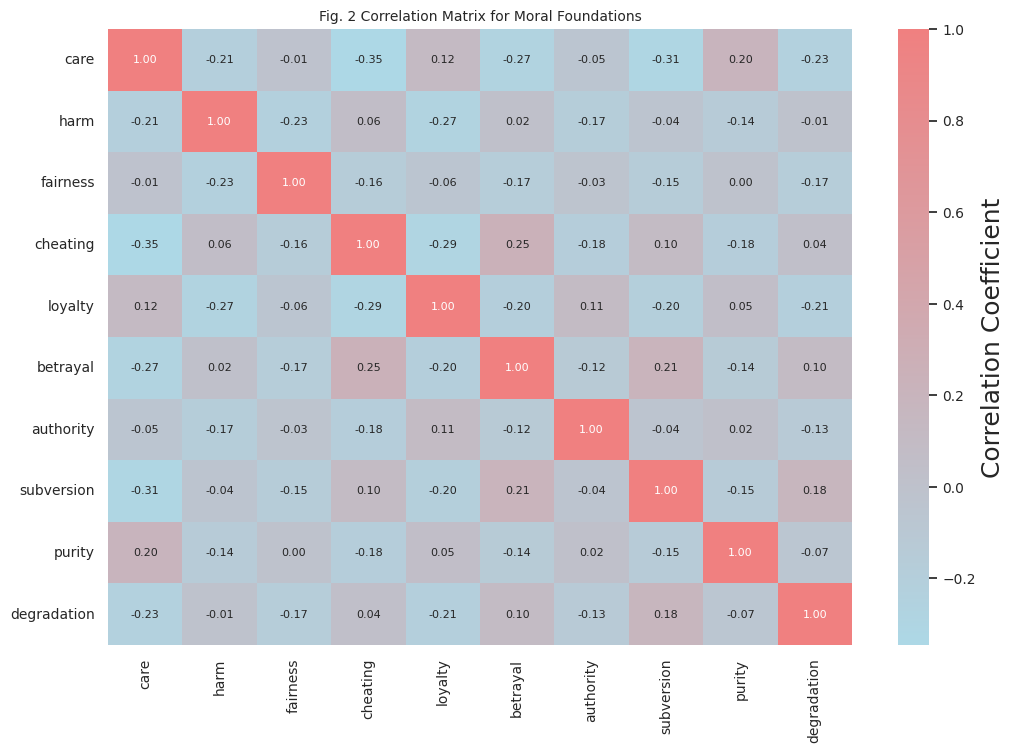

In [35]:
from matplotlib.colors import LinearSegmentedColormap

# Calculate correlations
correlation_matrix = df.iloc[:, 5:].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define a custom color palette
colors = ["lightblue", "lightcoral"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Draw the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation Coefficient'})

# Adjust font sizes for the axes and color bar labels
plt.tick_params(axis='both', which='major', labelsize=10)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=10)

# Set the title
plt.title('Fig. 2 Correlation Matrix for Moral Foundations', fontsize=10)

# Display the plot
plt.show()

**Step 2.1. Exploratory Data Analysis (Further)**

Deepening our exploratory data analysis to uncover more intricate patterns and relationships within the dataset, including:

**Part-of-Speech (POS) Tagging**

By identifying and tagging each word with its corresponding part of speech (e.g., noun, verb, adjective), based on its context within sentences, we can more accurately interpret sentences, understanding key actions and entities in each moral foundation, improving the quality and reliability of information extraction for further analysis.

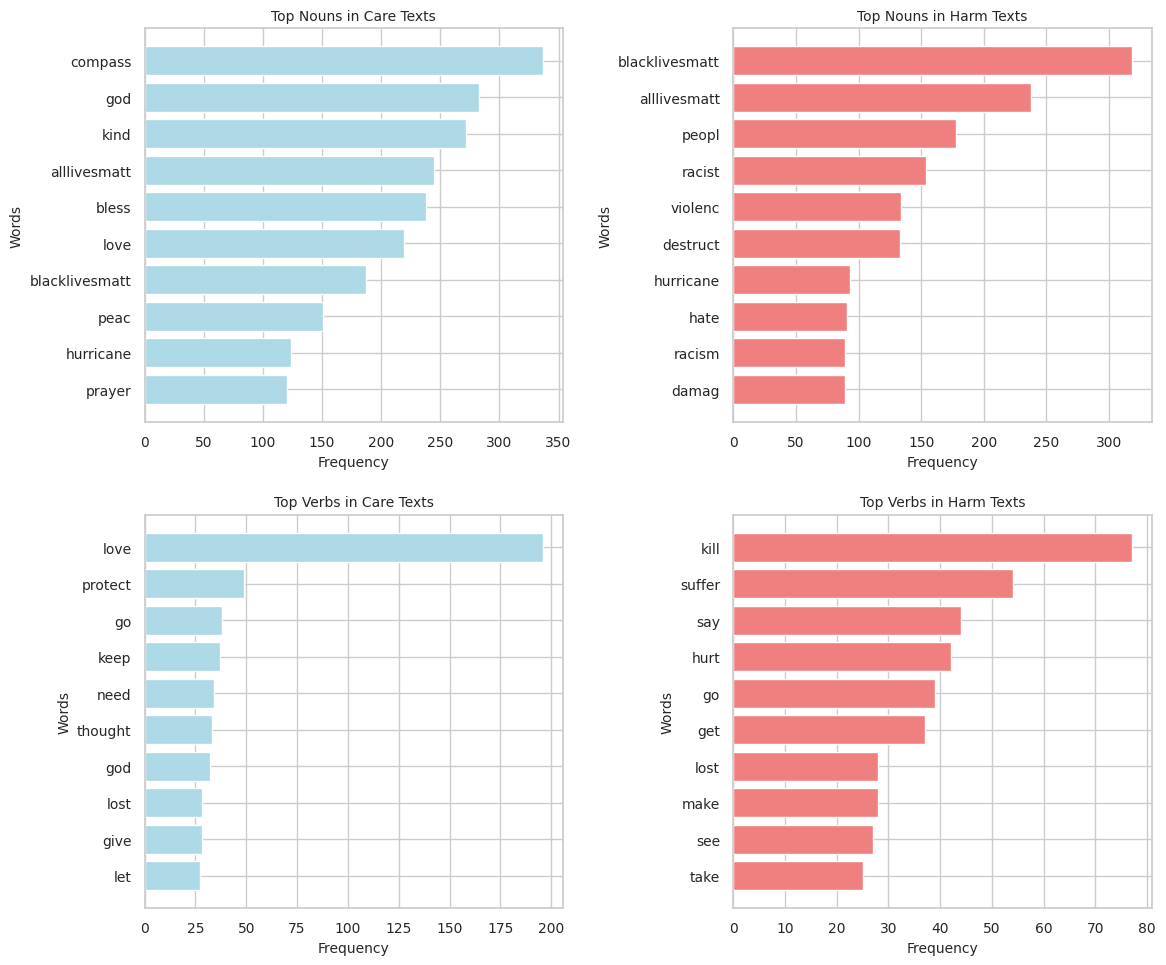

In [38]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

def pos_tag_text(text):
    """
    Tokenizes and applies POS tagging to a given text.
    :param text: str - The text to be processed.
    :return: List of tuples - Each tuple contains a token and its POS tag.
    """
    tokens = word_tokenize(text)
    return pos_tag(tokens)

def extract_filtered_words(pos_tags, filter_tag):
    """
    Extracts words from POS-tagged text based on a filter for POS tags.
    :param pos_tags: List of tuples - POS-tagged tokens.
    :param filter_tag: str - The POS tag filter (e.g., 'NN' for nouns, 'VB' for verbs).
    :return: List of words that meet the filter criteria.
    """
    return [word for word, tag in pos_tags if tag.startswith(filter_tag)]

# Remove NaN values and ensure all entries in 'new_clean_text_deep_stem' are strings
df['new_clean_text_deep_stem'] = df['new_clean_text_deep_stem'].dropna().astype(str)

# Apply POS tagging to a specific column in the DataFrame
df['pos_tags'] = df['new_clean_text_deep_stem'].apply(pos_tag_text)

# Example foundations, can be adjusted as necessary
moral_foundations = ['care', 'harm']

# Dictionary to hold frequency distributions for nouns and verbs
foundation_freq_dists = {'nouns': {}, 'verbs': {}}

# Process each moral foundation
for foundation in moral_foundations:
    # Filter rows where foundation score is above 0.5 and apply POS tagging
    foundation_texts = df[df[foundation] > 0.5]['new_clean_text_deep_stem']
    foundation_pos_tags = foundation_texts.apply(pos_tag_text)

    # Extract nouns and verbs and calculate frequency distributions
    all_nouns = foundation_pos_tags.apply(lambda tags: extract_filtered_words(tags, 'NN')).explode()
    all_verbs = foundation_pos_tags.apply(lambda tags: extract_filtered_words(tags, 'VB')).explode()

    foundation_freq_dists['nouns'][foundation] = FreqDist(all_nouns.dropna().astype(str))
    foundation_freq_dists['verbs'][foundation] = FreqDist(all_verbs.dropna().astype(str))

def plot_separate_foundation_comparisons(foundation_freq_dists):
    """
    Creates horizontal bar plots for the top 10 nouns and verbs in texts related to each moral foundation.
    :param foundation_freq_dists: dict - Contains frequency distributions for each foundation.
    """
    fig, axes = plt.subplots(nrows=2, ncols=len(foundation_freq_dists['nouns']), figsize=(12, 10))
    colors = ['lightblue', 'lightcoral']  # Colors for each foundation

    for idx, foundation in enumerate(foundation_freq_dists['nouns'].keys()):
        # Plot top nouns
        noun_freq_dist = foundation_freq_dists['nouns'][foundation]
        noun_words = [item[0] for item in noun_freq_dist.most_common(10)]
        noun_counts = [item[1] for item in noun_freq_dist.most_common(10)]
        axes[0, idx].barh(noun_words[::-1], noun_counts[::-1], color=colors[idx])  # Reverse order for descending display
        axes[0, idx].set_title(f'Top Nouns in {foundation.capitalize()} Texts', fontsize=10)
        axes[0, idx].set_ylabel('Words', fontsize=10)
        axes[0, idx].set_xlabel('Frequency', fontsize=10)
        axes[0, idx].tick_params(labelsize=10)

        # Plot top verbs
        verb_freq_dist = foundation_freq_dists['verbs'][foundation]
        verb_words = [item[0] for item in verb_freq_dist.most_common(10)]
        verb_counts = [item[1] for item in verb_freq_dist.most_common(10)]
        axes[1, idx].barh(verb_words[::-1], verb_counts[::-1], color=colors[idx])  # Reverse order for descending display
        axes[1, idx].set_title(f'Top Verbs in {foundation.capitalize()} Texts', fontsize=10)
        axes[1, idx].set_ylabel('Words', fontsize=10)
        axes[1, idx].set_xlabel('Frequency', fontsize=10)
        axes[1, idx].tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()

# Execute the plotting function
plot_separate_foundation_comparisons(foundation_freq_dists)

**Sequence Analysis**

By analyzing sequences like bigrams or trigrams, we can identify common phrases or patterns that reveal how concepts are connected or discussed in different moral foundations. This step is particularly important for detecting nuanced expressions and sentiments that depend heavily on word order.

In [20]:
from nltk.util import ngrams

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

# 'text' for the message and 'category' for the type (care or harm)
care_texts = df[df['care'] > 0.5]['new_clean_text_deep_stem'].dropna()
harm_texts = df[df['harm'] > 0.5]['new_clean_text_deep_stem'].dropna()

def analyze_texts(texts):
    # Generate and analyze bigrams
    bigram_freq = FreqDist()
    for text in texts:
        words = nltk.word_tokenize(text)
        bigrams = list(ngrams(words, 2))
        bigram_freq.update(bigrams)
    return bigram_freq

# Analyze care texts
care_bigram_freq = analyze_texts(care_texts)
print("\nBigrams in Care Texts:")
for bigram, frequency in care_bigram_freq.most_common(10):
    print(f"Bigram: {bigram}, Frequency: {frequency}")

# Analyze harm texts
harm_bigram_freq = analyze_texts(harm_texts)
print("\nBigrams in Harm Texts:")
for bigram, frequency in harm_bigram_freq.most_common(10):
    print(f"Bigram: {bigram}, Frequency: {frequency}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Bigrams in Care Texts:
Bigram: ('god', 'bless'), Frequency: 209
Bigram: ('act', 'kind'), Frequency: 89
Bigram: ('stay', 'safe'), Frequency: 39
Bigram: ('blacklivesmatt', 'alllivesmatt'), Frequency: 35
Bigram: ('love', 'compass'), Frequency: 33
Bigram: ('peac', 'love'), Frequency: 30
Bigram: ('east', 'coast'), Frequency: 26
Bigram: ('may', 'god'), Frequency: 25
Bigram: ('amaz', 'act'), Frequency: 24
Bigram: ('show', 'compass'), Frequency: 23

Bigrams in Harm Texts:
Bigram: ('racist', 'traitor'), Frequency: 37
Bigram: ('innoc', 'peopl'), Frequency: 34
Bigram: ('ye', 'fli'), Frequency: 34
Bigram: ('fli', 'confederateflag'), Frequency: 34
Bigram: ('confederateflag', 'racist'), Frequency: 34
Bigram: ('traitor', 'usa'), Frequency: 34
Bigram: ('usa', 'histori'), Frequency: 34
Bigram: ('histori', 'charlestonshoot'), Frequency: 34
Bigram: ('charlestonshoot', 'blacklivesmatt'), Frequency: 34
Bigram: ('polic', 'brutal'), Frequency: 29


**Word Embeddings**

To explore deeper meanings and relationships between words, we utilize Word2Vec to generate word embeddings. This approach helps us understand how terms like 'violence' frequently co-occur with other terms across the dataset, allowing us to identify thematic clusters and infer contextual meanings.

In [21]:
from gensim.models import Word2Vec

# Tokenize texts: This process splits the text into individual words (tokens).
sentences = df['new_clean_text_deep'].apply(nltk.word_tokenize).tolist()

# Initialize and train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Use the model to find words similar to 'police'
similar_words = model.wv.most_similar('violence', topn=5)
print("Words similar to 'violence':", similar_words)

# Filter sentences that contain 'violence' to examine specific examples
violence_sentences = [sentence for sentence in sentences if 'violence' in sentence]

# Print some sentences to understand the context of 'violence' usage
print("\nExample sentences containing 'violence':")
for sentence in violence_sentences[:3]:  # Print the first 3 sentences
    print(' '.join(sentence))

Words similar to 'violence': [('side', 0.9932643175125122), ('Violence', 0.9932405352592468), ('Democrat', 0.992946982383728), ('voice', 0.9928944706916809), ('crime', 0.9927381277084351)]

Example sentences containing 'violence':
Please understand alllivesmatter undermines anti black oppression violence
Inciting condoning senseless violence ANYONE okay AllLivesMatter
Prolife means condemn violence sanctity human life ViolenceIsNotTheAnswer Alllivesmatter lifeatanystage


**Word Clouds**

To provide an overall view of the key terms and themes within each moral foundation, we utilize word clouds to highlight the most prevalent concepts and terms associated with each category. By identifying these dominant elements, we gain a foundational understanding of the dataset's thematic structure to proceed with the training of predictive models.

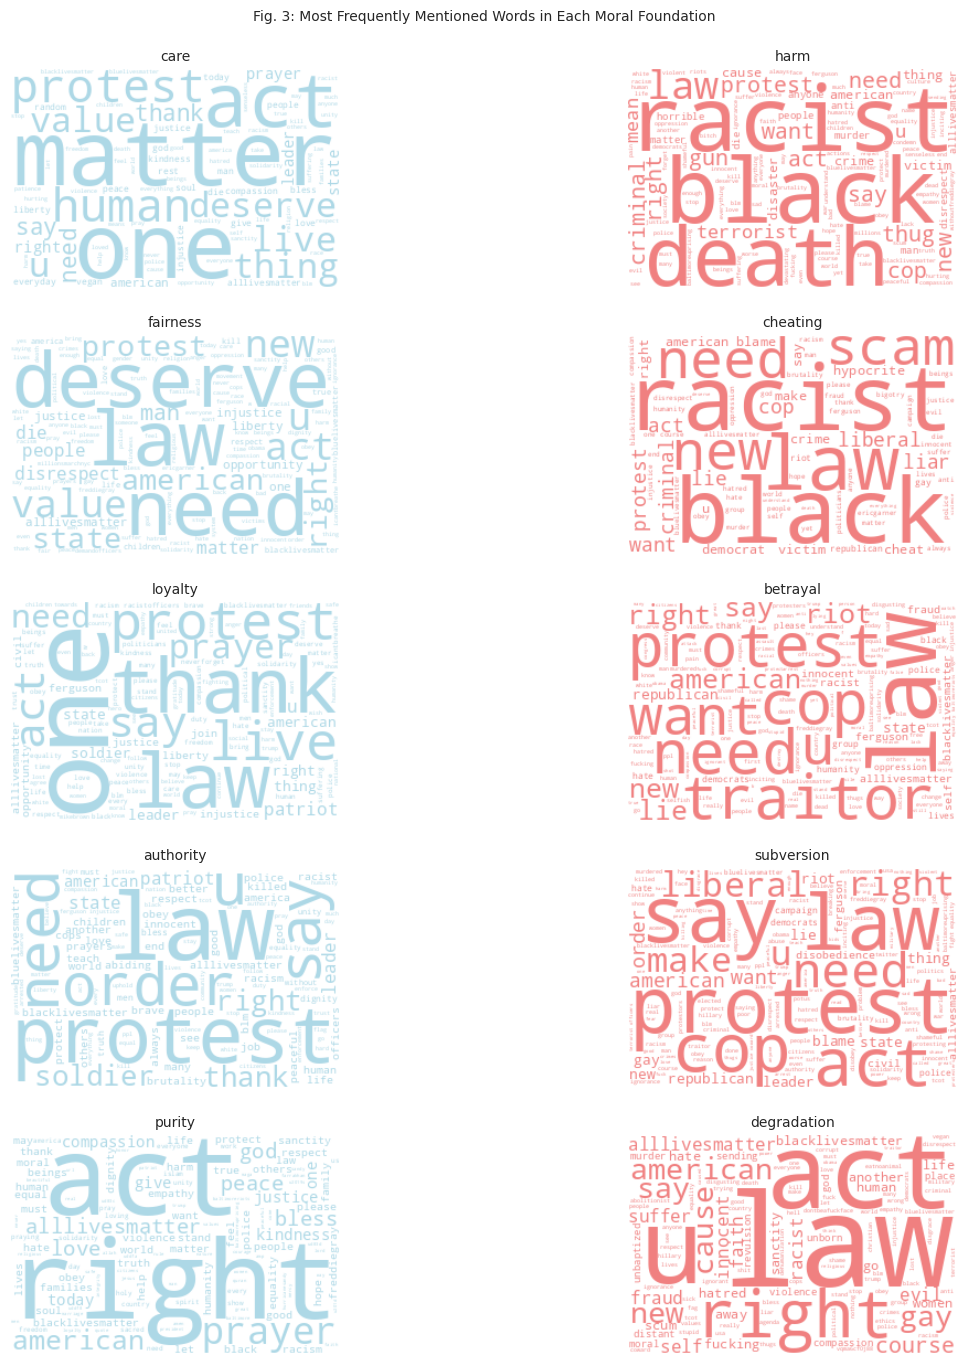

In [39]:
from wordcloud import WordCloud
from collections import Counter

categories = {
    'left': ['care', 'fairness', 'loyalty', 'authority', 'purity'],
    'right': ['harm', 'cheating', 'betrayal', 'subversion', 'degradation']
}

fig, axes = plt.subplots(nrows=max(len(categories['left']), len(categories['right'])), ncols=2, figsize=(16, 14))
plt.subplots_adjust(wspace=0.01)

# Adding a main title for the figure
fig.suptitle('Fig. 3: Most Frequently Mentioned Words in Each Moral Foundation', fontsize=10)

for i, category_group in enumerate(categories.items()):
    position, cats = category_group
    color = 'lightblue' if position == 'left' else 'lightcoral'
    for j, category in enumerate(cats):
        raw_text = ' '.join(df[df[category] > 0]['new_clean_text_deep'].dropna())
        word_counts = Counter(re.findall(r'\w+', raw_text.lower()))
        filtered_words = ' '.join(word for word, count in word_counts.items() if count > 15)  # Filter words appearing more than 15 times

        if filtered_words:
            wordcloud = WordCloud(width=300, height=200, background_color='white', color_func=lambda *args, **kwargs: color).generate(filtered_words)
            ax = axes[j][i] if len(cats) > 1 else axes[i]
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.set_title(category, fontsize=10)
            ax.axis("off")
        else:
            ax = axes[j][i] if len(cats) > 1 else axes[i]
            ax.text(0.5, 0.5, f"No sufficient data for {category}", horizontalalignment='center', verticalalignment='center')
            ax.axis("off")

plt.tight_layout()
plt.show()

**Cognitive Relationship Mapping**

Using SpaCy for natural language processing to explore the relationships between entities and actions within texts that mention specific figures, undersstanding how each figure is portrayed in discourse, aiding in deeper media analysis and potentially informing more targeted communication strategies.



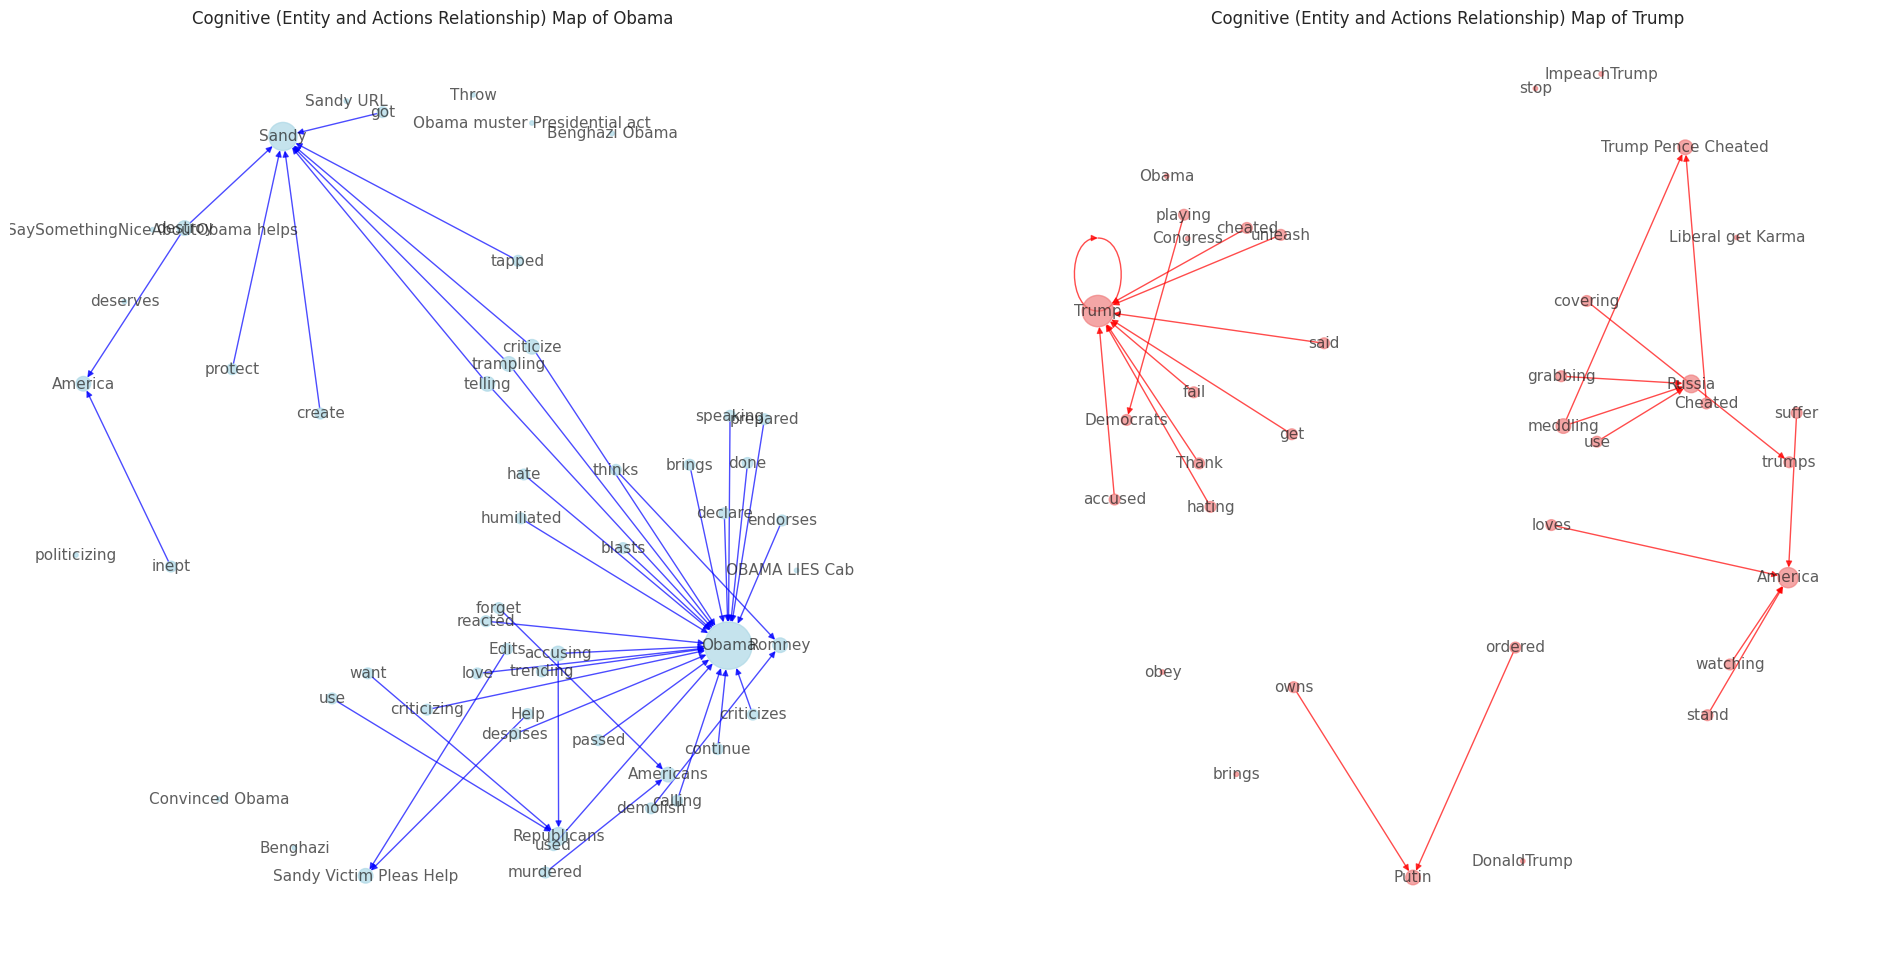

In [51]:
import spacy
import networkx as nx

# Load the NLP model from SpaCy
nlp = spacy.load("en_core_web_sm")

# Load DataFrame and filter for entries containing 'Trump' or 'Obama'
trump_texts = df[df['new_clean_text_deep'].str.contains('trump', case=False, na=False)]
obama_texts = df[df['new_clean_text_deep'].str.contains('obama', case=False, na=False)]

# Function to create a directed graph from texts
def create_graph(texts, entity_color, edge_color):
    G = nx.DiGraph()
    node_frequency = {}

    # Process texts
    for text in texts['new_clean_text_deep']:
        doc = nlp(text)
        for ent in doc.ents:
            for token in ent.subtree:
                if token.dep_ in ('nsubj', 'dobj') and token.head.pos_ == 'VERB':
                    subj = (token.head.text, 'VERB')
                    obj = (ent.text, ent.label_)

                    # Update frequency counts
                    node_frequency[subj] = node_frequency.get(subj, 0) + 1
                    node_frequency[obj] = node_frequency.get(obj, 0) + 1

    # Add nodes and edges with sufficient frequency
    for (node, label), freq in node_frequency.items():
        if freq >= 4:
            G.add_node(node, type=label)

    for text in texts['new_clean_text_deep']:
        doc = nlp(text)
        for ent in doc.ents:
            for token in ent.subtree:
                if token.dep_ in ('nsubj', 'dobj') and token.head.pos_ == 'VERB':
                    subj = (token.head.text, 'VERB')
                    obj = (ent.text, ent.label_)
                    if node_frequency[subj] >= 2 and node_frequency[obj] >= 5:
                        G.add_edge(subj[0], obj[0], label=token.dep_)

    # Layout
    pos = nx.spring_layout(G, k=1.0, scale=2, iterations=100)
    return G, pos

# Create graphs
G_trump, pos_trump = create_graph(trump_texts, 'lightcoral', 'red')
G_obama, pos_obama = create_graph(obama_texts, 'lightblue', 'blue')

# Plotting both graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

nx.draw_networkx(G_obama, pos_obama, ax=axes[0],
                 node_size=[G_obama.degree(node) * 50 + 10 for node in G_obama],
                 node_color='lightblue', alpha=0.7,
                 arrowstyle='-|>', arrowsize=9, edge_color='blue',
                 font_size=11)
axes[0].set_title('Cognitive (Entity and Actions Relationship) Map of Obama', fontsize=12)
axes[0].axis('off')

nx.draw_networkx(G_trump, pos_trump, ax=axes[1],
                 node_size=[G_trump.degree(node) * 50 + 10 for node in G_trump],
                 node_color='lightcoral', alpha=0.7,
                 arrowstyle='-|>', arrowsize=9, edge_color='red',
                 font_size=11)
axes[1].set_title('Cognitive (Entity and Actions Relationship) Map of Trump', fontsize=12)
axes[1].axis('off')

plt.show()